In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import os

In [12]:
#Import true Data
stri="LS-3"
directory="C:/Users/ameya/OneDrive - University of Pittsburgh/Eclipse/DataFiles/OctData/"+stri
#directory="C:/Users/asv26/OneDrive - University of Pittsburgh/Eclipse/DataFiles/OctData/"+stri
Data=np.zeros((2,2))
startindex=0
endindex=startindex+40
for i in range(startindex,endindex):
    path=os.path.join(directory,"LSdate0_"+str(i)+".txt")
    df=np.loadtxt(path,delimiter="\t")
    Data=np.concatenate((Data,df.T),axis=1)
print(Data)
#Data[1]=Data[1]-Data[1][0]
Data[0]=Data[0]

index=2
newVData=Data[0][index:-1]
newTData=Data[1][index:-1]#-Data[1][index]
newData=np.array([newVData.T,newTData.T])
print(newData)

fsData=1/np.mean(np.diff(newData[1]))
print(fsData)

[[ 0.00000000e+00  0.00000000e+00 -2.12986766e+00 ...  2.48797784e+00
   2.48800000e+00  2.48802216e+00]
 [ 0.00000000e+00  0.00000000e+00  1.69729205e+09 ...  1.69730408e+09
   1.69730408e+09  1.69730408e+09]]
[[-2.12986766e+00  5.25652700e-02  5.39000000e-02 ...  2.48803353e+00
   2.48797784e+00  2.48800000e+00]
 [ 1.69729205e+09  1.69729205e+09  1.69729205e+09 ...  1.69730408e+09
   1.69730408e+09  1.69730408e+09]]
425.5775155528337


In [13]:
#Import GA0 Data
directory="C:/Users/ameya/OneDrive - University of Pittsburgh/Eclipse/DataFiles/OctData/LS-4"
GA0Data=np.zeros((2,2))
startindex=0
endindex=startindex+40
for i in range(startindex,endindex):
    path=os.path.join(directory,"LSdate0_"+str(i)+".txt")
    df=np.loadtxt(path,delimiter="\t")
    GA0Data=np.concatenate((GA0Data,df.T),axis=1)
print(GA0Data)
GA0Data[0]=GA0Data[0]

index=2
newGA0VData=GA0Data[0][index:-1]
newGA0TData=GA0Data[1][index:-1]#-GA0Data[1][index]
newGA0=np.array([newGA0VData.T,newGA0TData.T])
print(newGA0)

[[ 0.00000000e+00  0.00000000e+00 -2.12141377e+00 ...  3.02293832e+00
   3.02306826e+00  3.02329581e+00]
 [ 0.00000000e+00  0.00000000e+00  1.69729200e+09 ...  1.69730403e+09
   1.69730403e+09  1.69730403e+09]]
[[-2.12141377e+00  1.09652700e-02  1.12838300e-02 ...  3.02274910e+00
   3.02293832e+00  3.02306826e+00]
 [ 1.69729200e+09  1.69729200e+09  1.69729200e+09 ...  1.69730403e+09
   1.69730403e+09  1.69730403e+09]]


(0.0, 1.0)

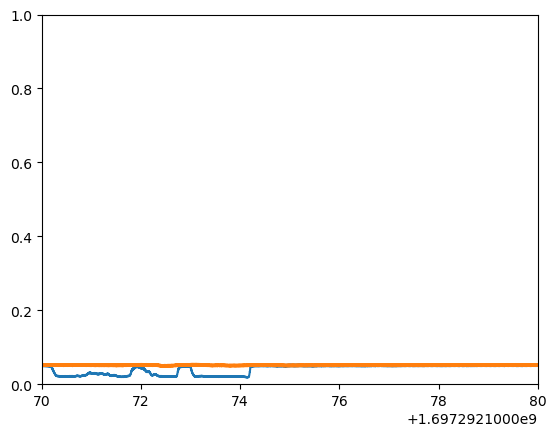

In [36]:
plt.plot(newGA0[1],newGA0[0])
plt.plot(newData[1],newData[0])
shift=1.697292e9
plt.xlim(shift+170,shift+180)
plt.ylim(0,1)

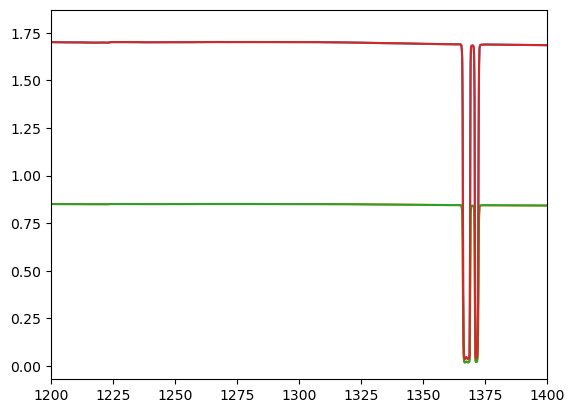

0.0


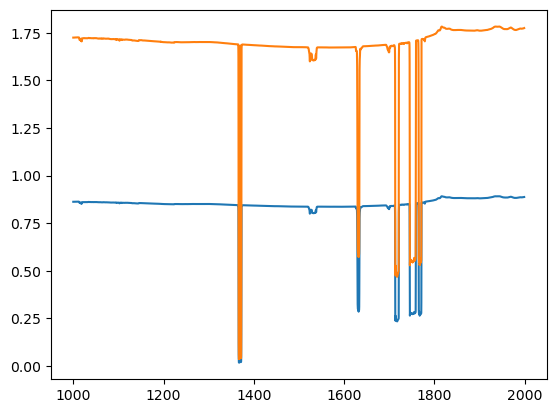

In [103]:
#LineUp
beginGA0=np.where(newGA0[1]<1000)[0][-1]
beginData=np.where(newData[1]<1000)[0][-1]

endGA0=np.where(newGA0[1]<2000)[0][-1]
endData=np.where(newData[1]<2000)[0][-1]

slicedGA0=np.array([newGA0[0][beginGA0:endGA0].T,newGA0[1][beginGA0:endGA0].T])
slicedData=np.array([newData[0][beginData:endData].T,newData[1][beginData:endData].T])


plt.plot(slicedData[1],slicedData[0])
plt.plot(slicedGA0[1],slicedGA0[0])
plt.xlim(1200,1400)

def quickInterpolate(x,t,st):
    result=np.array([])
    for i in st:
        begin=np.where(t<i)[0][-1]
        last=np.where(t>i)[0][0]
        result=np.append(result,(x[last]+x[begin])/2)
    return np.array([result,st])

st=np.linspace(1000,1999,5000)
iGA0=quickInterpolate(slicedGA0[0],slicedGA0[1],st)
iData=quickInterpolate(slicedData[0],slicedData[1],st)

plt.plot(iGA0[1],iGA0[0])
plt.plot(iData[1],iData[0])
plt.show()

def multSignals(a,b,bshift):
    #a and b are the same size. bshift is index to shift b by
    newb=np.concatenate((np.zeros(bshift),(b-np.max(b))**2))
    newa=np.concatenate(((a-np.max(a))**2,np.zeros(bshift)))
    return np.mean(newa*newb)
def findCorrelate(a,b):
    correlate=np.array([])
    for i in range(0,len(st)):
        correlate=np.append(correlate,multSignals(a,b,i))
    return np.argmax(correlate)
timeshift=st[findCorrelate(iGA0[0],iData[0])]-np.min(st)
print(timeshift)
plt.plot(iGA0[1],iGA0[0])
plt.plot(iData[1]+timeshift,iData[0])
#plt.xlim(1300,1490)
plt.show()

shiftedData=np.array([newData[0],newData[1]+timeshift])

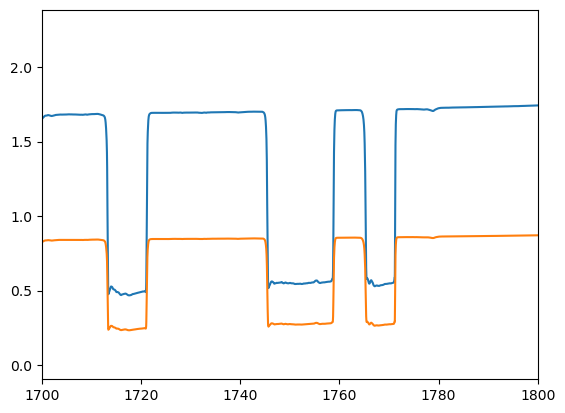

[[1.77012515e+00 1.77011856e+00 1.77009521e+00 ... 1.38490838e+00
  1.38499401e+00 1.38510299e+00]
 [0.00000000e+00 2.35676765e-03 4.73690033e-03 ... 4.36993783e+03
  4.36994018e+03 4.36994254e+03]]


In [104]:
shiftedData=np.array([newData[0],newData[1]+timeshift])
plt.plot(shiftedData[1],shiftedData[0])
plt.plot(newGA0[1],newGA0[0])
plt.xlim(1700,1800)
plt.show()
print(shiftedData)


In [105]:
fpath = "NewShiftedFiles/"+stri+".txt"
np.savetxt(fpath,shiftedData.T,fmt='%1.10f,%1.7f')
